In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

plt.style.use('ggplot')

### 訓練データ生成

In [2]:
n_sample = 100  # データ数
half_n_sample = 50  # ラベルを0と1に分ける境界のデータ数
var = .2

In [3]:
def gen_data(n_sample: int, half_n_sample: int):
    # ラベルが0のデータは数値を1小さくする
    x0 = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    # ラベルが1のデータは数値を1大きくする
    x1 = np.random.normal(size=n_sample).reshape(-1, 2) + 1.
    # 上で作成したデータを結合する
    X_train = np.concatenate([x0, x1])
    
    # 最初の50個は0、後の50個は1の1次元配列を作成
    y_train = np.concatenate([np.zeros(half_n_sample),
                                           np.ones(half_n_sample)]).astype(np.int)
    
    return X_train, y_train

In [4]:
#データ作成
x_train, y_train = gen_data(n_sample, half_n_sample)

In [5]:
print(x_train.shape)
print(y_train.shape)

(100, 2)
(100,)


In [17]:
print(x_train[:5, 0])
print(x_train[45:55, 0])
print(x_train[-5:, 0])

[-0.3558497  -2.75687941  0.03409377 -1.03022612 -1.89733635]
[-0.50425156 -0.50676705  0.07025955 -1.08842071 -0.41121722  0.0959806
  0.06169527 -0.10008324  2.74114759  1.78844926]
[0.79621549 2.39496546 0.72067258 0.46426553 0.60420046]


In [15]:
print(y_train[:10])
print(y_train[45:55])
print(y_train[-10:])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


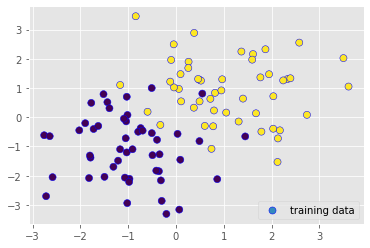

In [20]:
plt.scatter(x_train[:, 0], x_train[:, 1], label="training data",
                c=y_train, facecolor="none", edgecolor="b", s=50, )
plt.legend(loc='lower right')
plt.show()

### ロジスティック回帰モデル
上記の散布図を、ロジスティック回帰モデルで分類する。 <br/>
<br/>
確率的勾配降下法（SGD）を用い、学習率 $\eta$ とすると、以下の式で $w$ を更新する。 <br/>
$w^{k+1} = w^k - \eta (\sigma(w^T x) - y_i) x_i$

In [21]:
def add_one(x: np.ndarray) -> np.ndarray:
    """ 定数項として入力行列の1列目に1を追加する """
    ones = np.ones(len(x))[:, None]
    return np.concatenate([ones, x], axis=1)

In [22]:
def sigmoid(x):
    """ シグモイド関数 """
    return 1 / (1 + np.exp(-x))

In [23]:
def sgd(X_train, max_iter, eta):
    """ 確率的勾配降下法
    
    Parameters
    -------------
    X_train : np.ndarray
        学習データ
    max_iter : int
        最大の重みwの更新回数
    eta : float
        学習率
    
    Returns
    ---------
    w : np.ndarray
        重みパラメータ
    """
    w = np.zeros(X_train.shape[1])  # wはX_trainの列数の配列
    
    for _ in range(max_iter):
        w_prev = np.copy(w)  # 重み更新後のwと比較するために保持
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))
        w -= eta * grad  # 重みの更新
        
        # 更新前と後のwを比較し、値がほぼ近い場合は更新をやめてwを返す
        if np.allclose(w, w_prev):
            return w
        
    return w

In [24]:
max_iter = 100
eta = 0.01

In [25]:
X_train = add_one(x_train)

In [26]:
w = sgd(X_train, max_iter, eta)

In [27]:
print(w)

[0.02798304 2.31859258 2.06808124]


### 予測
入力に対し $y=1$ である確率 $p$ を出力する。つまり <br/>
$p(y=1 | x; w) = \sigma (w^{\mathrm{T}} x)$ <br/>
の値が 0.5 より大きければ $y=1$ に、小さければ $y=0$ に分類する。

In [54]:
# -5から5までの100個のデータを作成し、2つの行列を作成する。
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [55]:
print(xx0[:5, :5])
print(xx1[:5, :5])

[[-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]
 [-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]
 [-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]
 [-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]
 [-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]]
[[-5.        -5.        -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 -4.7979798 -4.7979798]
 [-4.6969697 -4.6969697 -4.6969697 -4.6969697 -4.6969697]
 [-4.5959596 -4.5959596 -4.5959596 -4.5959596 -4.5959596]]


In [56]:
print(xx.shape)
print(xx[:5])

(10000, 2)
[[-5.        -5.       ]
 [-4.8989899 -5.       ]
 [-4.7979798 -5.       ]
 [-4.6969697 -5.       ]
 [-4.5959596 -5.       ]]


In [57]:
X_test = add_one(xx)  # 1列目に全ての値が1の列を追加する

In [58]:
print(X_test.shape)
print(X_test[:5])

(10000, 3)
[[ 1.        -5.        -5.       ]
 [ 1.        -4.8989899 -5.       ]
 [ 1.        -4.7979798 -5.       ]
 [ 1.        -4.6969697 -5.       ]
 [ 1.        -4.5959596 -5.       ]]


In [59]:
proba = sigmoid(np.dot(X_test, w))  # シグモイド関数により確率pを求める

In [60]:
print(proba.shape)
print(proba[:10])

(10000,)
[3.06627920e-10 3.87546676e-10 4.89819800e-10 6.19082683e-10
 7.82457893e-10 9.88947633e-10 1.24992978e-09 1.57978481e-09
 1.99668821e-09 2.52361194e-09]


In [61]:
y_pred = (proba > 0.5).astype(np.int)

In [62]:
print(y_pred.shape)
print(y_pred[:10])

(10000,)
[0 0 0 0 0 0 0 0 0 0]


In [64]:
# プロット前の処理 : proba を xx0, xx1のサイズに変換する
Z_proba = proba.reshape(100, 100)

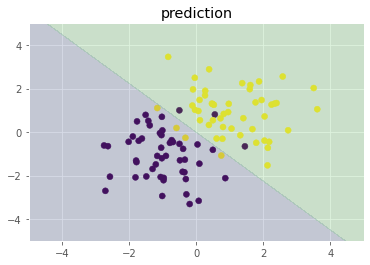

In [67]:
# 学習データは散布図でプロットする
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# 予測した分類を等高線で可視化する
# alpha: 透明度、 levels: 等高線の間隔
plt.contourf(xx0, xx1, Z_proba, alpha=0.2, levels=np.linspace(0, 1, 3))
plt.title('prediction')
plt.show()

### （比較用）scikit-learnによる予測

In [49]:
model = LogisticRegression(fit_intercept=True)
model.fit(x_train, y_train)
proba = model.predict_proba(xx)
y_pred = (proba > 0.5).astype(np.int)

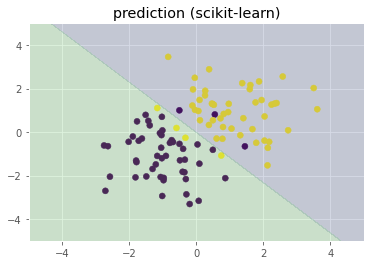

In [50]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba[:, 0].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.title('prediction (scikit-learn)')
plt.show()